In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
from math import gamma

In [2]:
A = 196.96657
rho = 1
def v(r):
    return z_0(i) / r * (1 - 3 / 2 * r / r_0 + 1 / 2 * pow((r / r_0), 3))
#если eta>>1
def z_0(i):
    return 317.5 * A * pow(T[i], (3 / 2))*2/(np.pi**(1/2)) * integral(-eta(i))/ (rho)
#функции Ферми-Дирака
#def i_much_less_minus1(k,x):
 #   return gamma(k+1)*math.exp(x)
#def i_much_more_1(k,x):
#    return x**(k+1)/(k+1)
def integral(x):
    sqx=x**(1/2)
    xsqx=x*sqx
    #Апроксимация функции дирака трёхчленной формулой при k=1/2
    if (x>=176868.709):
        return xsqx/1.5+0.82246703342411321823620758332301/sqx+0.71027462212293443818237742585514/(x*xsqx);
    elif (x<-17.9):
            return 0.88622692545275801364908374167057*math.exp(x)
    
    else: 
        if (x>30.0):
           i0=x
        else:
           i0=math.log(1.0+math.exp(x),math.e)
        
        return (0.8862269254528)*i0*((1.0+1.178*i0+(0.1812102675)*(i0**3.0))**(1.0/6.0))   
def eta(i):
    q = 2.795*10**(-3)*z*rho/(A*T[i]**(3/2))
    return 1/2*math.log(math.pi/6,math.e)-3/2*math.log((math.exp((2/3*q**(2))**(1/3))-1),math.e)

In [3]:
z = 79
a_0 =  0.52917721067*10**(-8)
Na = 6.022* 10**(23)
r_0 = 1/a_0*(3/(4*math.pi)*A/(rho*Na))**(1/3)
T = [0.01, 0.1, 1, 10]
z = 79

rho = 1

#eta = [2.78, 4.75, 6.99, 10.1]
#eta = 1/2*math.log(math.pi/6,math.e)-3/2*math.log((math.exp((2*q**2/3)**(1/3))-1),math.e)
#q = 2.795*10**(-3)*z_0*rho/(A*T**(3/2))
# Z_0 = [3.80, 17.1, 57.8, 77.9]
# r_* = [2.63, 2.58, 0.83, 0.11]
# theta =


# rho_e = pow((2*theta),(3/2))*(I(-eta)_(1/2))/(2*pow(math.pi,2))
# rho_e = Z_0/((4/3)*math.pi*pow(r_0,3))
# Z_0 = 4/3*math.pi*pow(r_0,3)*pow((2*theta),(3/2))/(2*pow(math.pi,2))*(I(-eta)_(1/2))


G=[[],[],[],[]]
R=[[],[],[],[]]
for i in range(0,4):
    z_0(i)
    print(z_0(i))
    eta(i)
    r = 0.01
    while r < r_0-0.01:
        v(r)
        y = r * v(r)
        G[i].append(y)
        R[i].append(r)
        r += 0.01

98.21810697254608
83.84772890698817
79.63660084240017
79.16067695299135


Plot:  1   T=  0.01
Plot:  2   T=  0.1
Plot:  3   T=  1
Plot:  4   T=  10


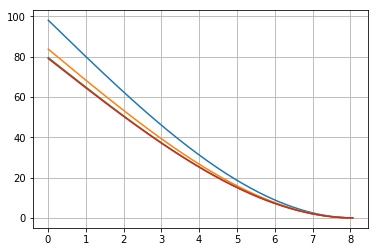

In [4]:
fig = plt.figure()
for i in range(0,4):
    graph1 = plt.plot(R[i], G[i])
    print('Plot: ',i+1,' ','T= ', T[i])



# save(name='pic_2_1', fmt='pdf')
# save(name='pic_2_1', fmt='png')
plt.grid(True)
plt.show()